In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

figsize = (15,15)

## TP Data loading (TPs and IDEs) + Waveforms for event 47

In [6]:
import tpvalidator.basic as tvb
import tpvalidator.utilities as utils
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tpvalidator.backtracker_legacy import BackTrackerPlotter


# data_path = "../data/vd/ide/tpgtree_st_mu_minus_vd_tpg_2_old.root"
data_path = "../data/vd/ide/tpgtree_st_mu_minus_vd_tpg_9.root"
mu_vd = tvb.BasicTPData(data_path)

# # FIXME: Waveform loading to be better integrated with the data object
waves = utils.load_sparse_waveform_data("../data/vd/trigger_digits_waves_mu_minus_vd_detsim_0.root")
ev_num = int(waves.event.unique()[0])
mu_vd.waveforms[ev_num] = waves


{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'threshold_tpg_plane0': 60,
        'threshold_tpg_plane1': 60,
        'threshold_tpg_plane2': 50,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

Using VD strip geometry (ϑ=30.0°, ϑ=-30.0°)

[47]

1

found 242 channels

Loading dataframe

Done loading dataframe

In [7]:
df_ev = utils.load_event_list("../data/vd/trigger_digits_waves_mu_minus_vd_detsim_0.root", "triggerana/rawdigis_tree")

In [8]:
[df_ev.index.get_loc(idx) for idx in df_ev[df_ev.event==47].index]

[0]

{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'threshold_tpg_plane0': 60,
        'threshold_tpg_plane1': 60,
        'threshold_tpg_plane2': 50,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

Using VD strip geometry (ϑ=30.0°, ϑ=-30.0°)

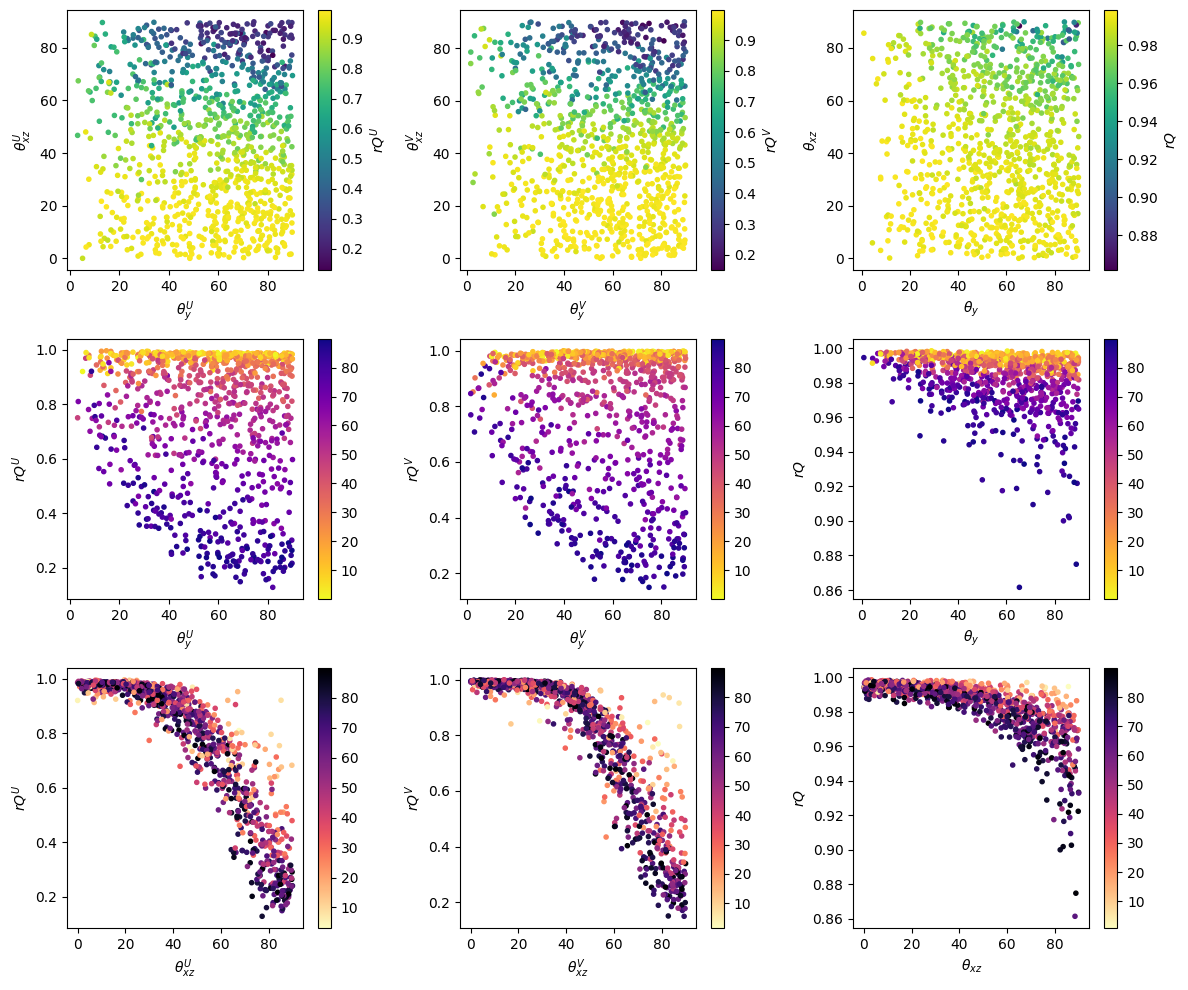

In [9]:
mu_vd._init_angles()
btp = BackTrackerPlotter(mu_vd, ev_num)

fig = btp.plot_angular_correlations(figsize=(10,8))

fig.tight_layout()




# Backtracking afficiencies vs drift-centric angles $\theta_{drift}$

{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'threshold_tpg_plane0': 60,
        'threshold_tpg_plane1': 60,
        'threshold_tpg_plane2': 50,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

Using VD strip geometry (ϑ=30.0°, ϑ=-30.0°)

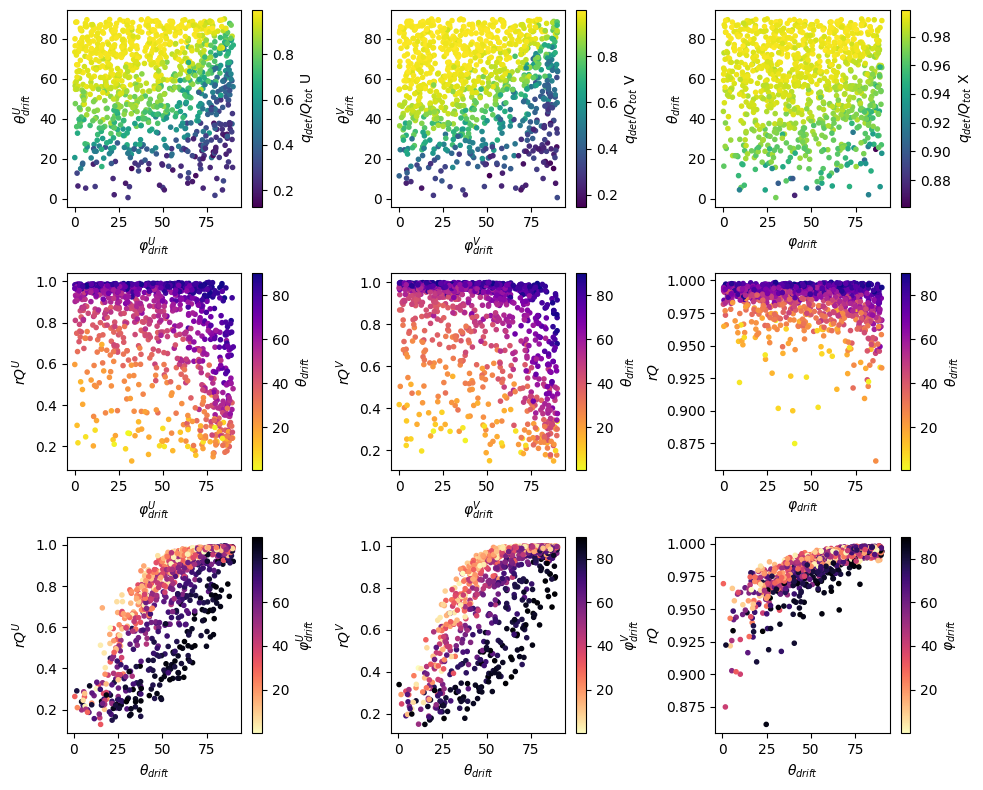

In [11]:
mu_vd._init_angles()

btp = BackTrackerPlotter(mu_vd, ev_num)

fig = btp.plot_alternative_angular_correlations(figsize=(10,8))

fig.tight_layout()

/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/awkward_pandas/array.py:120: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(ak.is_none(self._data))


TypeError: cannot set astype for copy = [True] for dtype (awkward [(0,)]) to different shape (bool [(0, 0)])

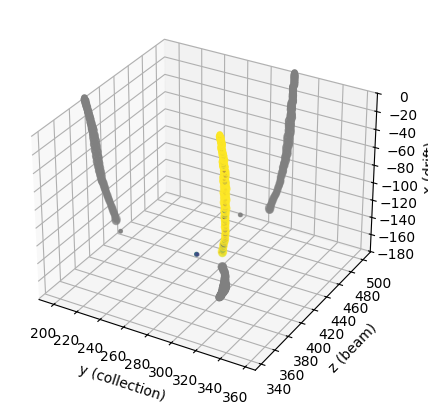

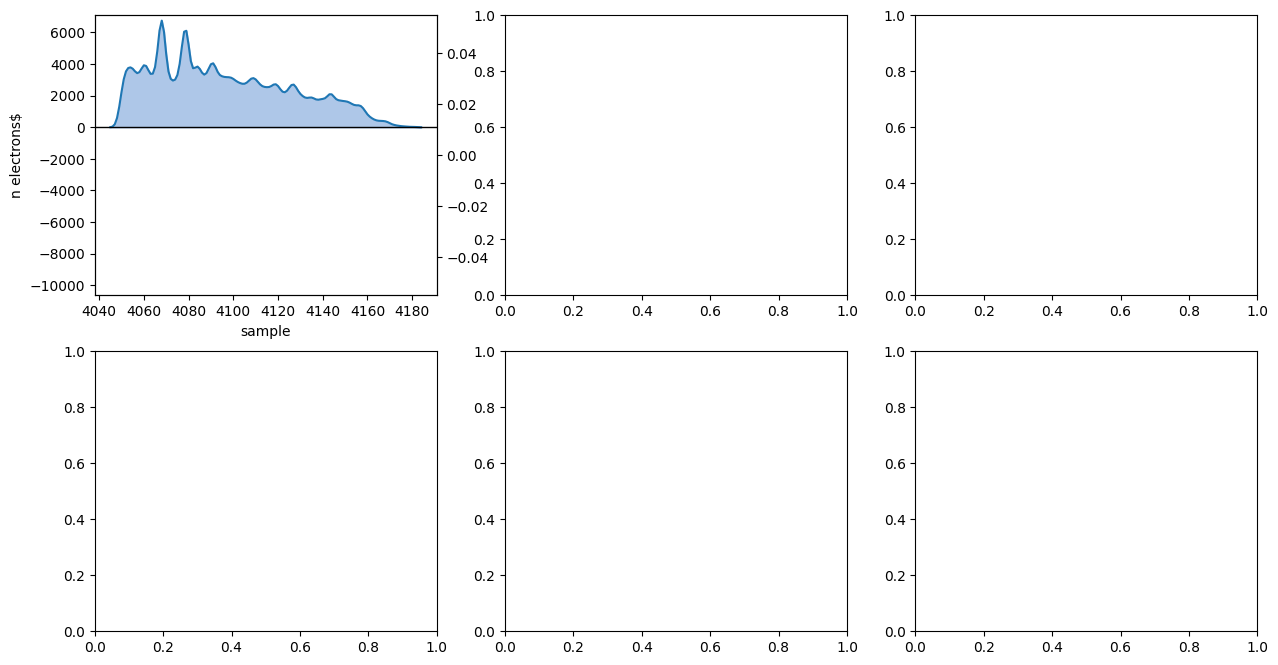

In [19]:
# display(y[(y.theta_xzV > 89)][['event','theta_yV', 'theta_xzV', 'rQ_V']])

ev_num = 47

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(5,5))
basic.draw_tps_point_of_origin(ax, mu_vd, ev_num, is_signal=True)

tp_idx = [4,0,4]


btp = BackTrackerPlotter(mu_vd, ev_num)
# fig = btp.plot_tps_vs_ides([100,100])
fig = btp.plot_tps_vs_ides_by_plane(1, [0,1,21,22,23,24], figsize=(15,8))
fig.tight_layout()


## Dataset visual inspection

/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: divide by zero encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: overflow encountered in dot
  vecw = np.dot(M, vec.data)
/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: invalid value encountered in dot
  vecw = np.dot(M, vec.data)


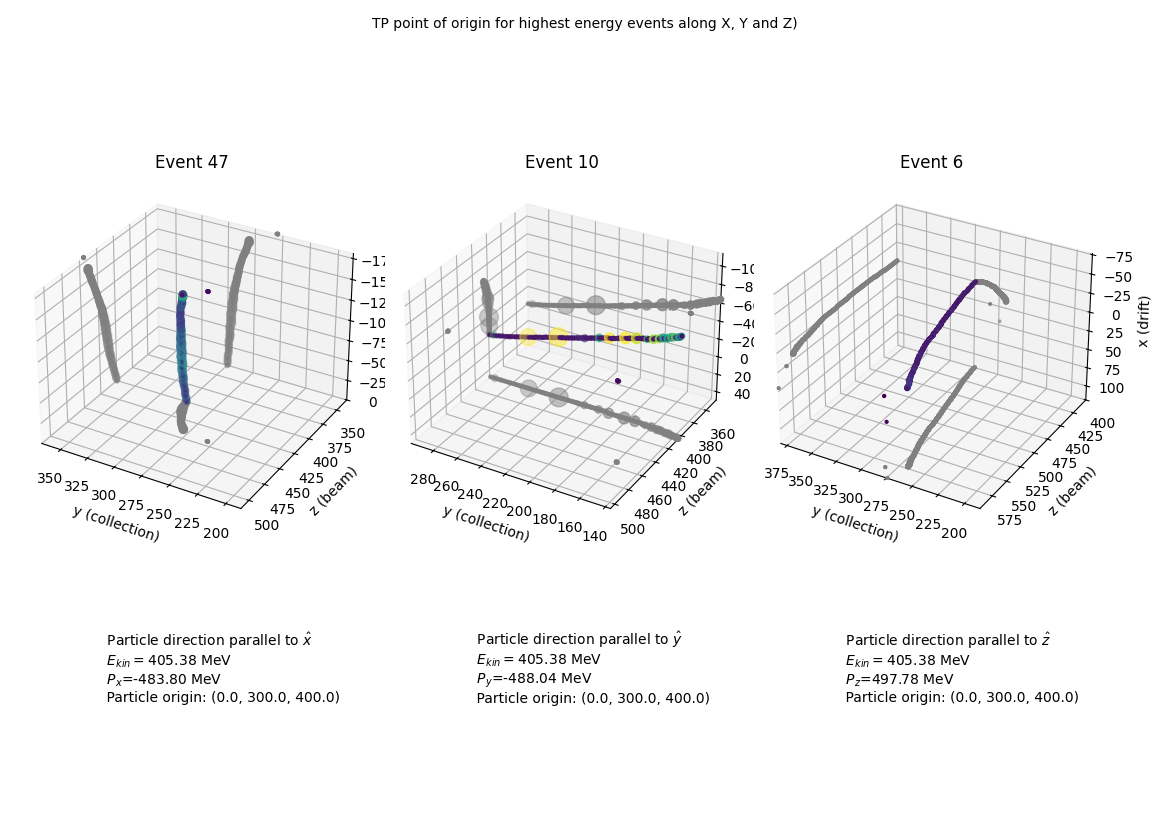

In [ ]:
fig = tvb.plot_3dev_points_of_origin(mu_vd)
fig.tight_layout()

## Event with poor backtracking efficiency of new algorithm

In [13]:
mu_vd.mc[(mu_vd.mc.detQ_U / mu_vd.mc.totQ_U) <  0.2]

event       Eng        Ekin  startX  startY  startZ        Px  \
entry subentry                                                                  
46    0            47  0.511042  405.383698     0.0   300.0   400.0 -0.483797   
71    0            72  0.511042  405.383698     0.0   300.0   400.0 -0.484469   
141   0           142  0.511042  405.383698     0.0   300.0   400.0 -0.399203   
181   0           182  0.511042  405.383698     0.0   300.0   400.0 -0.464949   
300   0           301  0.511042  405.383698     0.0   300.0   400.0 -0.466687   
353   0           354  0.511042  405.383698     0.0   300.0   400.0 -0.395431   
392   0           393  0.511042  405.383698     0.0   300.0   400.0 -0.489958   
414   0           415  0.511042  405.383698     0.0   300.0   400.0  0.498537   
467   0           468  0.511042  405.383698     0.0   300.0   400.0 -0.458983   
514   0           515  0.511042  405.383698     0.0   300.0   400.0  0.495453   
527   0           528  0.511042  405.383698     0.0   300.0   400.0  0.494495   
719   0           720  0.511042  405.383698     0.0   300.0   400.0 -0.482784   
737   0           738  0.511042  405.383698     0.0   300.0   400.0 -0.423005   
753   0           754  0.511042  405.383698     0.0   300.0   400.0  0.469655   
838   0           839  0.511042  405.383698     0.0   300.0   400.0 -0.426369   
995   0           996  0.511042  405.383698     0.0   300.0   400.0 -0.495520   

                      Py        Pz    P      totQ_X      totQ_U      totQ_V  \
entry subentry                                                                
46    0         0.039365  0.119961  0.5   9028237.0   9032566.0   9033291.0   
71    0        -0.111517  0.053417  0.5   9167854.0   9173453.0   9173740.0   
141   0        -0.161058  0.254356  0.5   9407453.0   9412445.0   9412468.0   
181   0         0.058285 -0.174430  0.5   8940100.0   8945342.0   8944854.0   
300   0         0.025754 -0.177595  0.5   9068300.0   9073290.0   9073437.0   
353   0        -0.200995  0.230728  0.5   9102880.0   9107096.0   9107615.0   
392   0        -0.015003  0.098569  0.5   9049151.0   9054671.0   9054233.0   
414   0        -0.006101 -0.037729  0.5  10274057.0  10276292.0  10277322.0   
467   0         0.063289 -0.187960  0.5   9183084.0   9188800.0   9188516.0   
514   0        -0.055707  0.037723  0.5  10115474.0  10118015.0  10117895.0   
527   0         0.059283 -0.044271  0.5  10076744.0  10078874.0  10079609.0   
719   0        -0.060441 -0.115178  0.5   8986551.0   8990917.0   8990397.0   
737   0        -0.147672  0.221946  0.5   9281270.0   9286088.0   9286358.0   
753   0         0.037821 -0.167313  0.5  10119395.0  10122836.0  10122200.0   
838   0         0.111079 -0.236370  0.5   9179957.0   9185617.0   9185053.0   
995   0         0.034563  0.057144  0.5   8973134.0   8978065.0   8978222.0   

                   detQ_X       detQ_U       detQ_V  
entry subentry                                       
46    0         8633923.0  1446880.125  2714664.000  
71    0         8402681.0  1636328.500  2325824.500  
141   0         9131337.0  1869103.375  7288547.000  
181   0         8606288.0  1333281.875  4383451.000  
300   0         8704687.0  1608952.125  2077096.125  
353   0         8895992.0  1524707.375  6602596.000  
392   0         8626624.0  1414981.500  1362653.875  
414   0         9470425.0  2043560.375  1954893.375  
467   0         8884577.0  1518257.000  4883016.000  
514   0         9546396.0  2014596.750  2260730.250  
527   0         9688537.0  1881828.375  2563152.250  
719   0         8347479.5  1154500.125  1342783.750  
737   0         8809389.0  1647192.375  4391753.000  
753   0         9914346.0  1911354.000  5967560.500  
838   0         8862031.0  1568199.750  5747536.500  
995   0         8092892.5  1683198.500  1783322.750

In [14]:
mu_vd.angles[mu_vd.angles.event.isin(list(mu_vd.mc[(mu_vd.mc.detQ_U / mu_vd.mc.totQ_U) <  0.2].event))]

event    theta_y   theta_yU   theta_yV   theta_xz  theta_xzU  \
entry subentry                                                                 
46    0            47  85.484428  80.304390  75.691444  76.073944  78.996460   
71    0            72  77.112679  78.226761  88.911560  83.708008  81.793633   
141   0           142  71.209099  53.014297  73.769615  57.496346  88.234932   
181   0           182  83.305794  68.874855  75.886940  69.435966  85.482094   
300   0           301  87.047447  70.527252  73.629372  69.165939  81.891068   
353   0           354  66.297348  53.085106  78.542686  59.737041  81.555954   
392   0           393  88.280479  79.296265  81.041229  78.625107  85.763817   
414   0           415  89.300919  86.603371  85.902794  85.672165  87.226936   
467   0           468  82.728104  67.117279  74.795311  67.730156  85.122108   
514   0           515  83.603172  83.047600  89.448196  85.646019  86.606110   
527   0           528  83.190666  82.185745  89.003204  84.884109  86.620026   
719   0           720  83.057030  82.006882  74.933762  76.581711  77.172195   
737   0           738  72.821808  57.852966  76.305237  62.314495  87.710098   
753   0           754  85.661858  70.875877  75.405685  70.391747  83.814301   
838   0           839  77.164223  58.635292  72.642891  60.996941  87.047844   
995   0           996  86.036186  86.306847  82.325829  83.421631  83.266418   

                theta_xzV  theta_drift  theta_beam  theta_coll     theta_u  \
entry subentry                                                               
46    0         86.936836    14.626068   76.118042   85.484428   80.304382   
71    0         75.722679    14.317902   83.867119  102.887321   78.226761   
141   0         56.258022    37.021805   59.421879  108.790901   53.014290   
181   0         73.503716    21.581238  110.417564   83.305794  111.125145   
300   0         76.609161    21.033035  110.805122   87.047447  109.472748   
353   0         53.798161    37.733917   62.518871  113.702652   53.085098   
392   0         82.756035    11.502426   78.630302   91.719521   79.296265   
414   0         88.439537     4.383827   94.327507   90.699081   93.396629   
467   0         72.038681    23.369507  112.081238   82.728104  112.882713   
514   0         82.286682     7.732895   85.673172   96.396828   83.047600   
527   0         81.548409     8.509766   95.079712   83.190666   97.814255   
719   0         89.377441    15.078812  103.318077   96.942970   97.993118   
737   0         60.547596    32.219772   63.647537  107.178192   57.852962   
753   0         76.079002    20.063957  109.549782   85.661858  109.124115   
838   0         63.306374    31.489243  118.212318   77.164223  121.364693   
995   0         89.842682     7.675781   83.437439   86.036186   86.306839   

                   theta_v    phi_coll  phi_drift  phi_drift_u  phi_drift_v  \
entry subentry                                                                
46    0          75.691437  166.073944  18.167107    41.832901    78.167107   
71    0          91.088432  173.707993  64.405327    55.594666     4.405334   
141   0          73.769608  147.496338  32.341873    87.658119    27.658123   
181   0         104.113052  159.435944  18.476883    78.476875    41.523132   
300   0         106.370621  159.165924   8.251389    68.251373    51.748627   
353   0          78.542686  149.737045  41.060219    78.939774    18.939774   
392   0          81.041222  168.625107   8.654671    68.654678    51.345322   
414   0          94.097206    4.327841   9.184921    50.815090    69.184906   
467   0         105.204681  157.730148  18.609131    78.609108    41.390900   
514   0          89.448196    4.353976  55.895607    64.104385     4.104385   
527   0          90.996796    5.115895  53.248604    66.751404     6.751419   
719   0         105.066231  166.581696  27.688583    32.311428    87.688576   
737   0          76.305237  152.314499  33.637901    86.362091  

## Event 208, low backtracker efficiency with old algorithm 

/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/awkward_pandas/array.py:120: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(ak.is_none(self._data))


TypeError: cannot set astype for copy = [True] for dtype (awkward [(0,)]) to different shape (bool [(0, 0)])

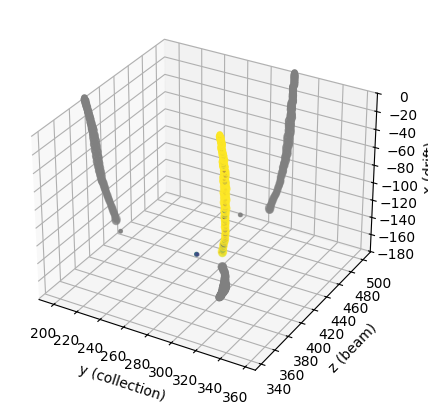

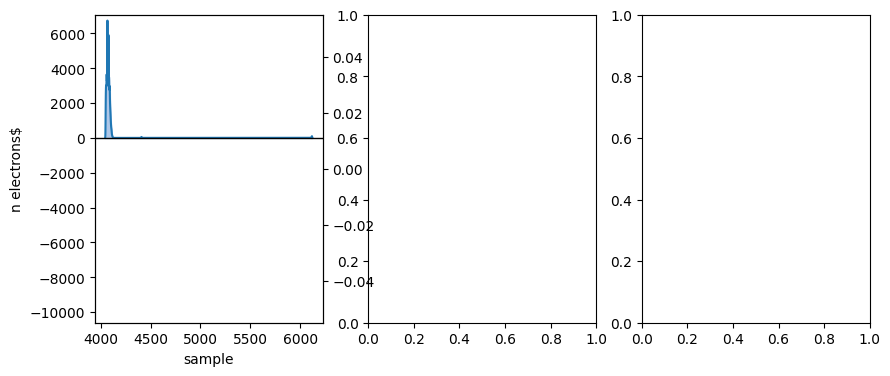

In [18]:
from tpvalidator.backtracker_legacy import BackTrackerPlotter
import tpvalidator.basic as basic

ev_num = 47

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(5,5))
basic.draw_tps_point_of_origin(ax, mu_vd, ev_num, is_signal=True)

tp_idx = [4,0,4]


btp = BackTrackerPlotter(mu_vd, ev_num)
# fig = btp.plot_tps_vs_ides([100,100])
fig = btp.plot_tps_vs_ides_one_per_plane(tp_idx, figsize=(10,4))

fig.tight_layout()



## Event 47, low efficiency ( < 0.2) on U plane with new algorithm

In [16]:
mu_vd.mc.Px.where(mu_vd.mc.Px < 0, 0)

entry  subentry
0      0           0.000000
1      0           0.000000
2      0          -0.380063
3      0          -0.395636
4      0           0.000000
                     ...   
995    0          -0.495520
996    0          -0.451080
997    0           0.000000
998    0           0.000000
999    0           0.000000
Name: Px, Length: 1000, dtype: float32

/Users/ale/Development/dune/trigger-studies/tpvalidator/.venv/lib/python3.13/site-packages/awkward_pandas/array.py:120: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(ak.is_none(self._data))


TypeError: cannot set astype for copy = [True] for dtype (awkward [(0,)]) to different shape (bool [(0, 0)])

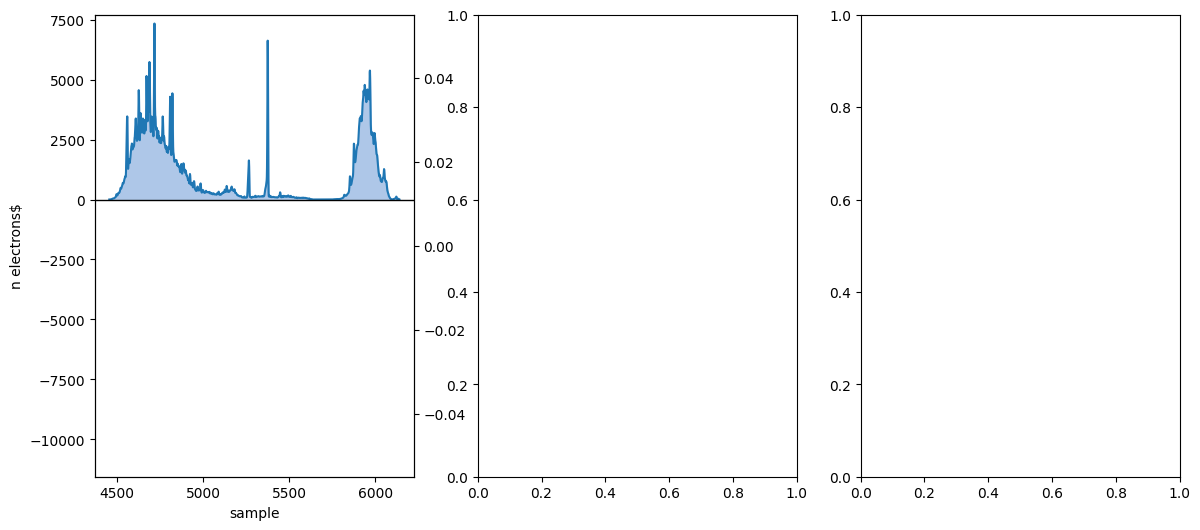

In [17]:
ev_num = 47

# fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8,8))
# basic.draw_tps_point_of_origin(ax, mu, ev_num, is_signal=True)

tp_idx = [40,46,66]

# df_sel_tps = plot_3_tps_and_ides_from_event(mu_vd, ev_num, tp_idx)
# print(df_sel_tps.to_markdown())
# print(mu_vd.mc[mu_vd.mc.event == ev_num].to_markdown())

btp = BackTrackerPlotter(mu_vd, ev_num)
# fig = btp.plot_tps_vs_ides([100,100])
fig = btp.plot_tps_vs_ides_one_per_plane([20,0,4], figsize=(14,6))

fig.tight_layout()

print(btp.selected_tps.to_markdown())

```ide_chans = set(c for c in mu_vd.ides[mu_vd.ides.event == ev_num].channel.unique())
raw_chans  = set( int(c) for c in chans)

len(ide_chans)
len(raw_chans)
len(raw_chans.intersection(ide_chans))
```


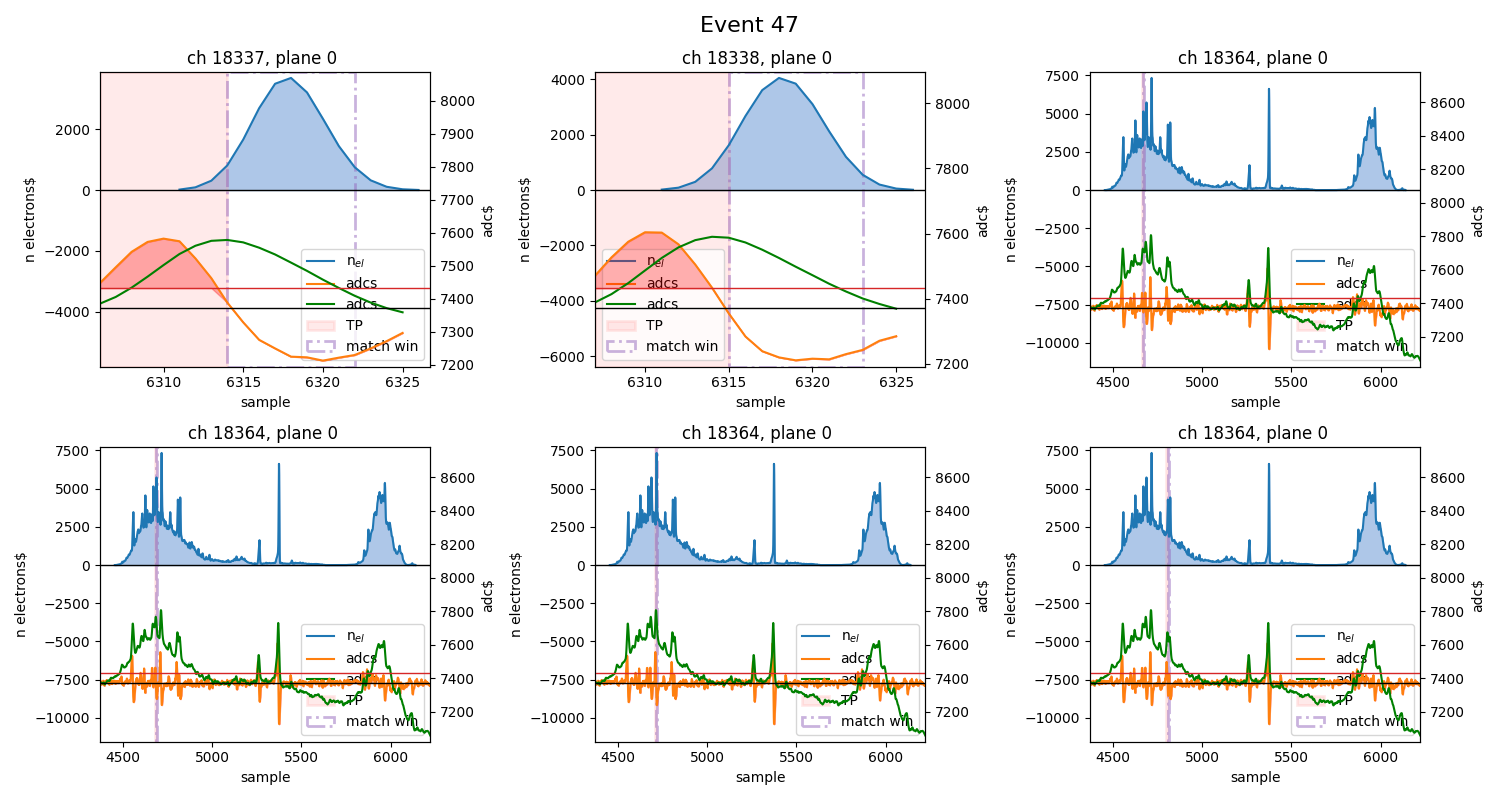

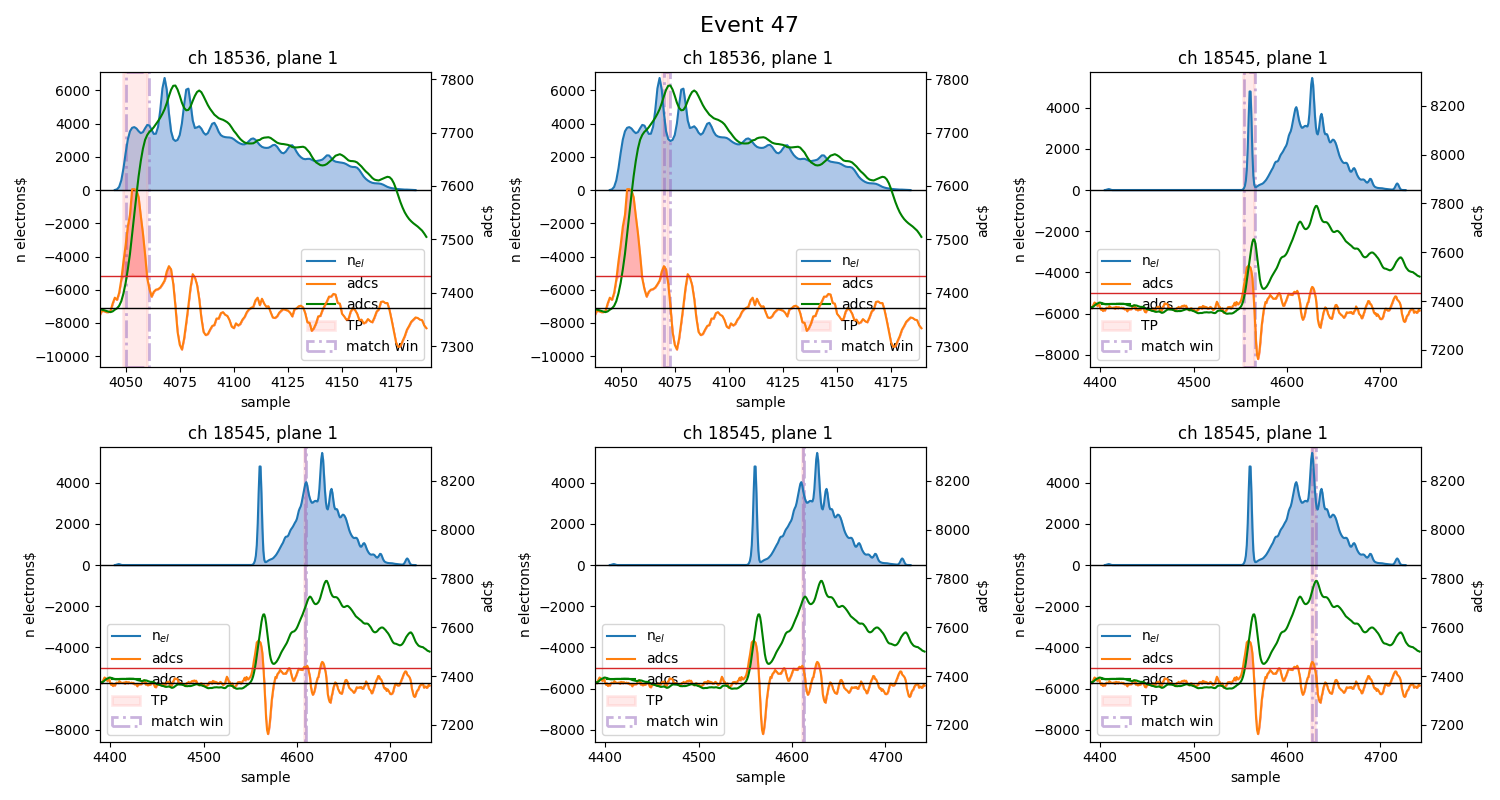

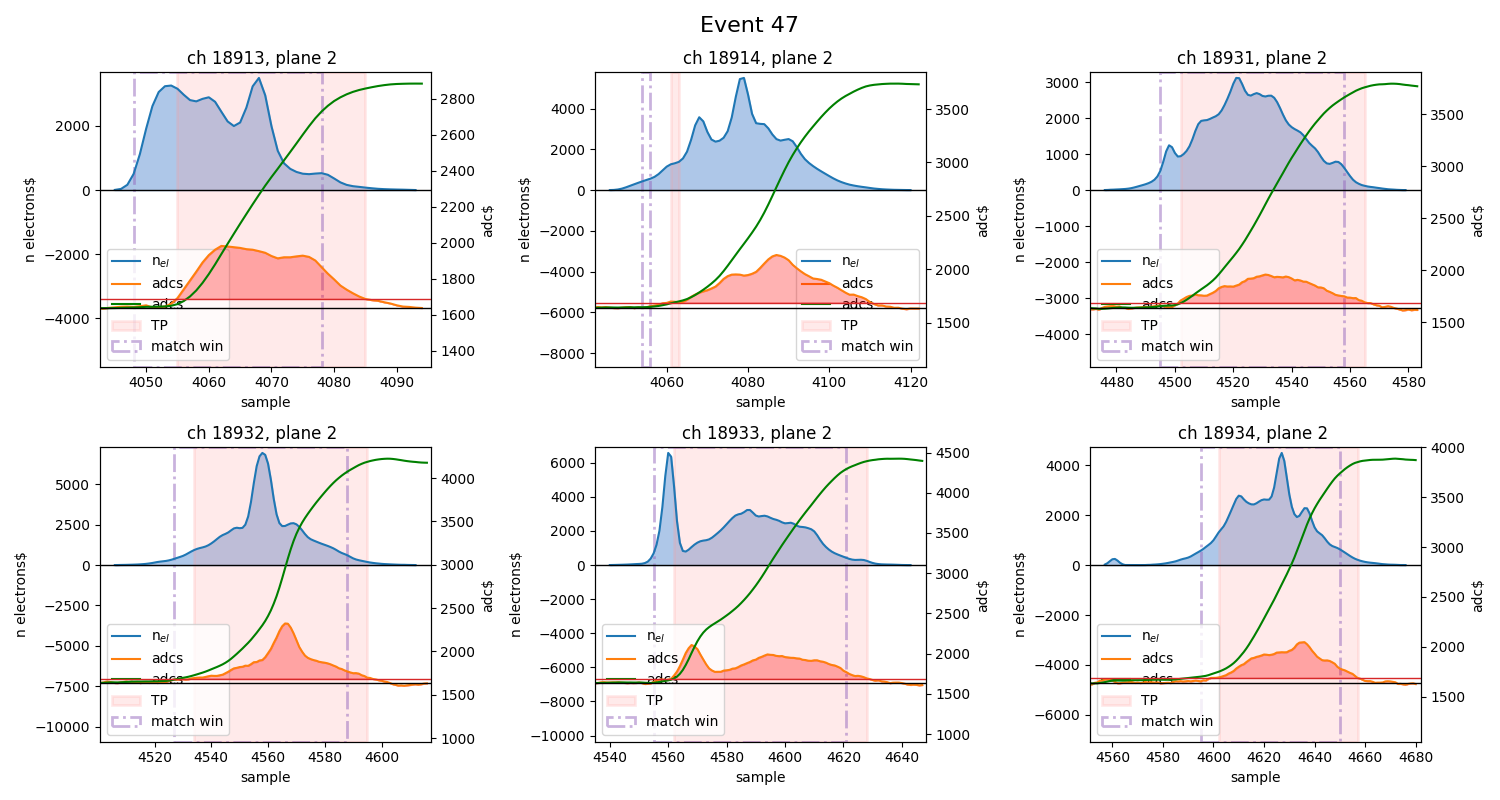

In [ ]:


ev_num = 47
from tpvalidator.backtracker_legacy import BackTrackerPlotter
btp = BackTrackerPlotter(mu_vd, ev_num)
# fig = btp.plot_tps_vs_ides([100,100])
fig = btp.plot_tps_vs_ides_by_plane(0, [0,1,21,22,23,24], figsize=(15,8))
fig.tight_layout()

fig = btp.plot_tps_vs_ides_by_plane(1, [0,1,21,22,23,24], figsize=(15,8))
fig.tight_layout()

fig = btp.plot_tps_vs_ides_by_plane(2, [0,1,21,22,23,24], figsize=(15,8))
fig.tight_layout()



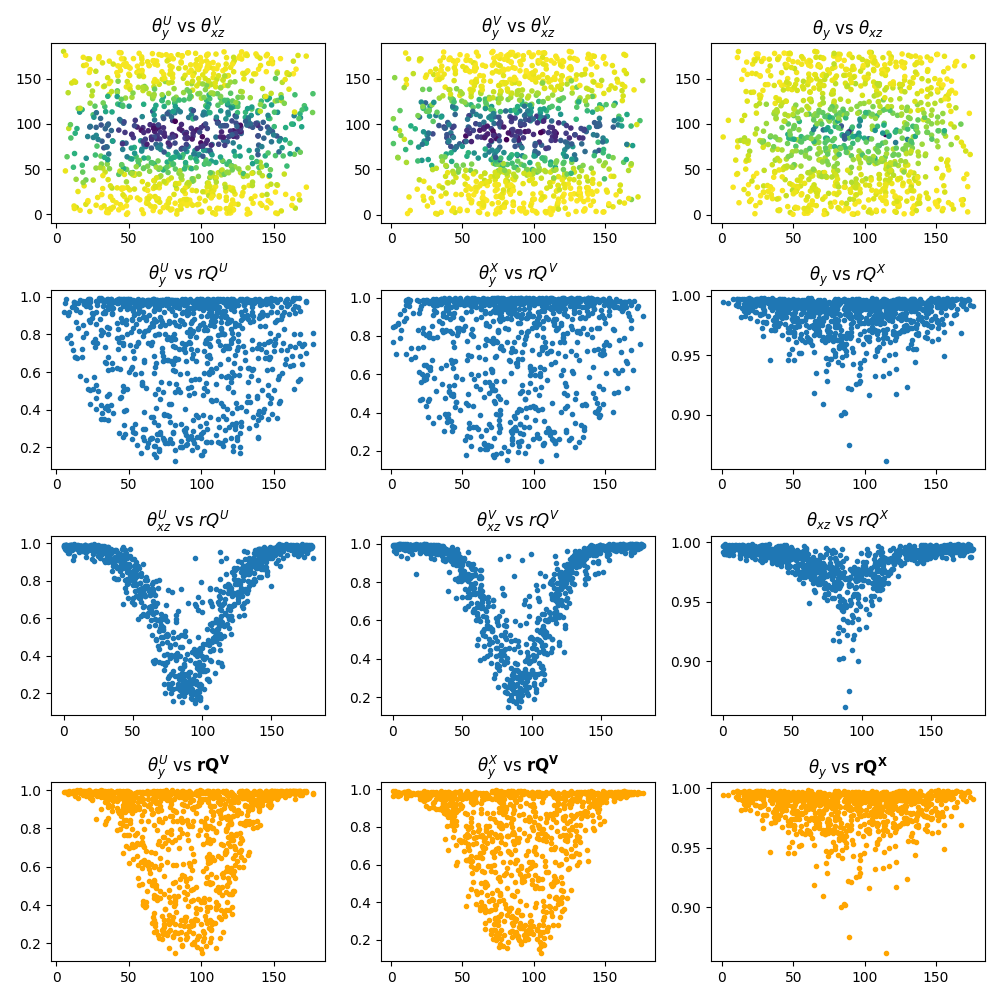

In [ ]:
x = mu_vd.mc.copy()
x['rQ_U'] = x.detQ_U/x.totQ_U
x['rQ_V'] = x.detQ_V/x.totQ_V
x['rQ_X'] = x.detQ_X/x.totQ_X

# x.rQ_X.hist(bins=100)

y = x.join(mu_vd.angles, lsuffix='_caller', rsuffix='_other')

m = '.'
figsize=(10,10)

fig, ax = plt.subplots(4,3, figsize=figsize)

ax[0][0].set_title(r"$\theta_y^U$ vs $\theta_{xz}^V$")
ax[0][1].set_title(r"$\theta_y^V$ vs $\theta_{xz}^V$")
ax[0][2].set_title(r"$\theta_y$ vs $\theta_{xz}$")

ax[0][0].scatter(y.theta_yU, y.theta_xzU, c=y.rQ_U, marker=m)
ax[0][1].scatter(y.theta_yV, y.theta_xzV, c=y.rQ_V, marker=m)
ax[0][2].scatter(y.theta_y, y.theta_xz, c=y.rQ_X, marker=m)

ax[1][0].set_title(r"$\theta_y^U$ vs $rQ^U$")
ax[1][1].set_title(r"$\theta_y^X$ vs $rQ^V$")
ax[1][2].set_title(r"$\theta_y$ vs $rQ^X$")

ax[1][0].scatter( y.theta_yU, y.rQ_U, marker=m)
ax[1][1].scatter( y.theta_yV, y.rQ_V, marker=m)
ax[1][2].scatter( y.theta_y,  y.rQ_X, marker=m)

ax[2][0].set_title(r"$\theta_{xz}^U$ vs $rQ^U$")
ax[2][1].set_title(r"$\theta_{xz}^V$ vs $rQ^V$")
ax[2][2].set_title(r"$\theta_{xz}$ vs $rQ^X$")

ax[2][0].scatter(y.theta_xzU, y.rQ_U, marker=m)
ax[2][1].scatter(y.theta_xzV, y.rQ_V, marker=m)
ax[2][2].scatter(y.theta_xz, y.rQ_X, marker=m)

ax[3][0].set_title(r"$\theta_y^U$ vs $\mathbf{rQ^V}$")
ax[3][1].set_title(r"$\theta_y^X$ vs $\mathbf{rQ^V}$")
ax[3][2].set_title(r"$\theta_y$ vs $\mathbf{rQ^X}$")

ax[3][0].scatter( y.theta_yU, y.rQ_V, marker=m, c='orange')
ax[3][1].scatter( y.theta_yV, y.rQ_U, marker=m, c='orange')
ax[3][2].scatter( y.theta_y,  y.rQ_X, marker=m, c='orange')
fig.tight_layout()


# fig, ax = plt.subplots(3,3, figsize=figsize)

# ax[0][0].scatter(y.theta_u, y.phi_ind_u, c=y.rQ_U, marker=m)
# ax[0][1].scatter(y.theta_v, y.phi_ind_v, c=y.rQ_V, marker=m)
# ax[0][2].scatter(y.theta_coll, y.phi_coll, c=y.rQ_X, marker=m)

# ax[1][0].scatter( y.theta_u, y.rQ_V, marker=m)
# ax[1][1].scatter( y.theta_v, y.rQ_U, marker=m)
# ax[1][2].scatter( y.theta_coll,  y.rQ_X, marker=m)

# ax[2][0].scatter(y.phi_ind_u, y.rQ_U, marker=m)
# ax[2][1].scatter(y.phi_ind_v, y.rQ_V, marker=m)
# ax[2][2].scatter(y.phi_ind_v, y.rQ_X, marker=m)
# fig.tight_layout()



In [ ]:
y[y.theta_yU < 3][['theta_y', 'theta_beam', 'theta_coll', 'theta_drift']]

theta_y  theta_beam  theta_coll  theta_drift
entry subentry                                                
250   0         57.777283   32.251991   57.777283    88.769547
714   0         59.573677   30.473782   59.573677    88.458260
855   0         60.337498   29.714046   60.337498    91.594551

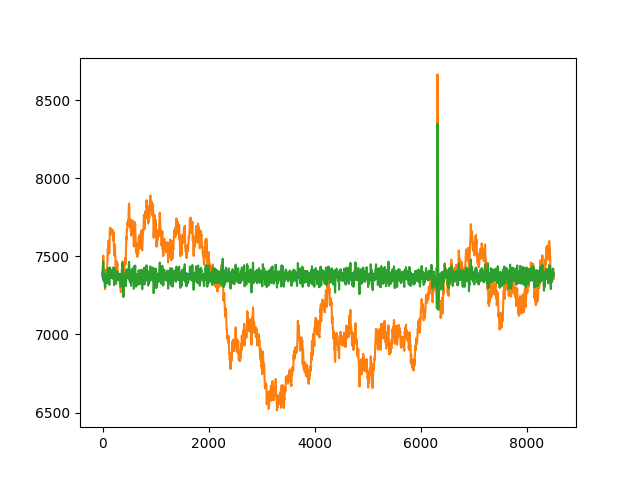

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Filter parameters
cutoff_freq = 10  # Cutoff frequency in Hz
fs = 1000  # Sampling rate in Hz
order = 1  # Filter order

# Design the high-pass filter (change btype to 'highpass')
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype='highpass')  # <-- modify here

wf = mu_vd.waveforms[47].reset_index()[18337]
fix, ax = plt.subplots(1,1)
wf_int = ((wf-wf.mean()).cumsum()+wf.mean())

filtered_data = filtfilt(b, a, wf_int-wf.mean())



ax.plot(wf.index, wf.values)
ax.plot(wf.index, wf_int.values)
ax.plot(wf.index, filtered_data+wf.mean())
fig.tight_layout()

Warning: no waveform data found in ../data/vd/ide/tpgtree_st_mu_minus_vd_tpg_9.root for event 715

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

No waveforms found for event '715'

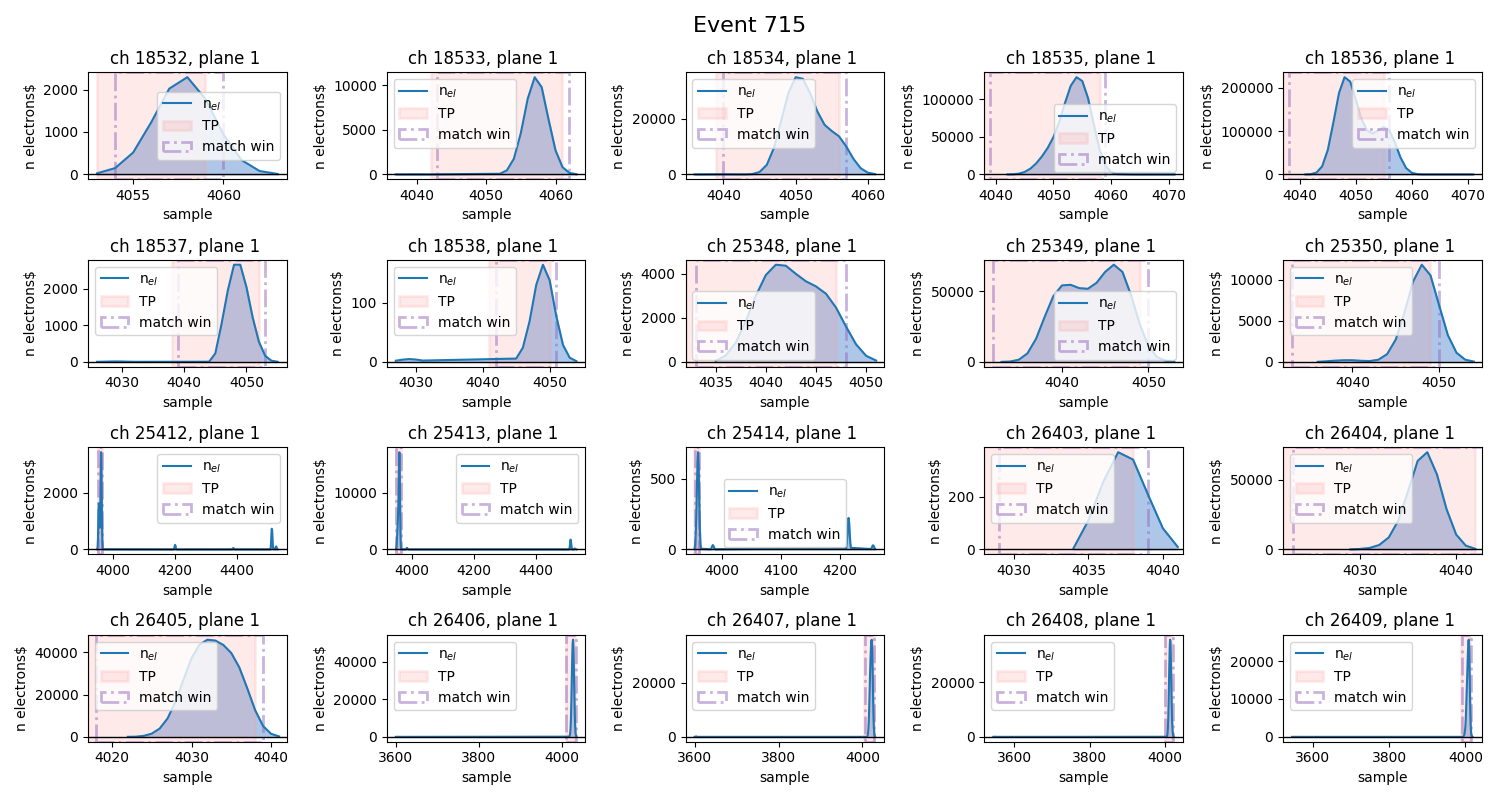

In [ ]:
tp_idx = [6,0,0]
ev_num = 715
from tpvalidator.backtracker_legacy import BackTrackerPlotter
btp = BackTrackerPlotter(mu_vd, ev_num)
# fig = btp.plot_tps_vs_ides([100,100])
fig = btp.plot_tps_vs_ides_by_plane(1, range(20), figsize=(15,8))
fig.tight_layout()

/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_42928/3109909385.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


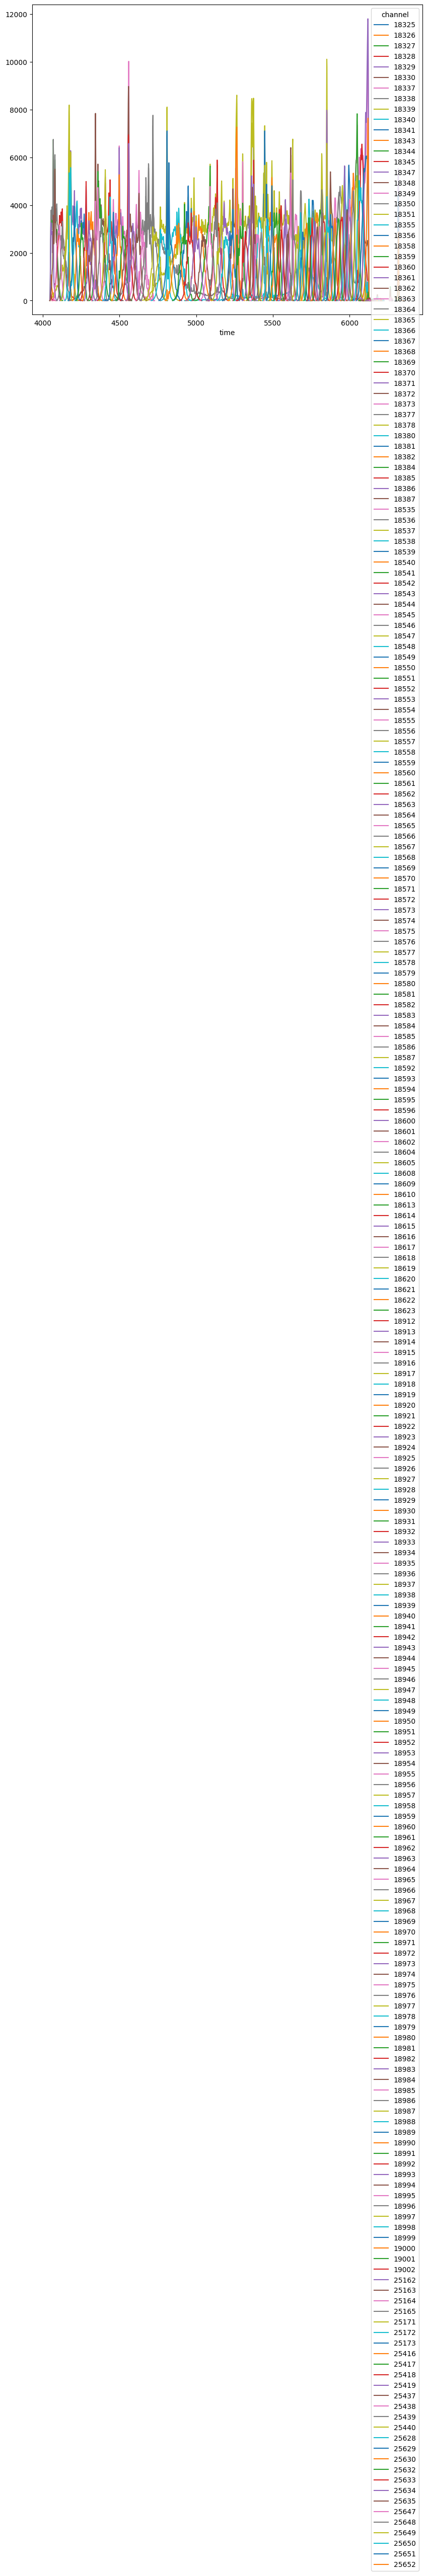

In [ ]:
x = mu_vd.ides[mu_vd.ides.event == 47].copy()
y = x[['time', 'nElectrons', 'channel']]
df_pivoted = y.pivot(index='time', columns='channel', values='nElectrons')

df_pivoted.plot(figsize=(10,8))
plt.tight_layout()

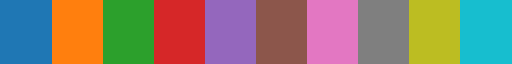

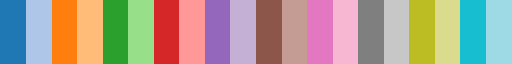

In [ ]:
import matplotlib
cmap = matplotlib.colormaps['tab10']

display(cmap)
cmap = matplotlib.colormaps['tab20']
display(cmap)


In [ ]:
data_path = "../data/vd_test/tpgtree_st_mu_minus_vd_tpg_0.root"
mu_minus_vd_data = tvb.BasicTPData(data_path)


{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'threshold_tpg_plane0': 60,
        'threshold_tpg_plane1': 60,
        'threshold_tpg_plane2': 50,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

In [ ]:
print(mu_minus_vd_data.info['tpg'])

{'threshold_tpg_plane0': 60, 'threshold_tpg_plane1': 60, 'threshold_tpg_plane2': 50, 'tool': 'TPAlgTPCSimpleThreshold'}
